# 1. Importando bibliotecas


## Importando bibliotecas

In [1]:
# Montando o google drive para acessar imagens
from google.colab import drive
drive.mount('/content/gdrive')
#!unzip /dataset-images-ebhi-main.zip -d IMAGENS

Mounted at /content/gdrive


In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import glob # localizar arquivos
import tensorflow
import seaborn as sns

# Bibliotecas para TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Bibliotecas para Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importação das bibliotecas concluída.")

Importação das bibliotecas concluída.


## Declaração das variáveis

In [3]:
# Variáveis

# 5 categorias
#path = "/content/gdrive/MyDrive/Colab Notebooks/ebhi-split/"
# 2 categorias
path = "/content/gdrive/MyDrive/Colab Notebooks/ebhi-split-2categorias/"
#import os
#os.chdir(path)
#!ls

#trecho para dividir dataset descomentar caso necessario
#!pip install split_folders
#import splitfolders
#splitfolders.ratio(path,seed=1337, output="IMAGENS-SPLIT", ratio=(0.6, 0.2, 0.2))
#path = "./IMAGENS-SPLIT/"

# diretorio de treino
train_folder=path+"train/"
train_normal_dir=train_folder+"NORMAL/"
train_pneu_dir=train_folder+"ANORMAL/"
# diretorio de teste
test_folder=path+"test/"
test_normal_dir=test_folder+"NORMAL/"
test_pneu_dir=test_folder+"ANORMAL/"
# diretorio de validacao
val_folder=path+"val/"
val_normal_dir=val_folder+"NORMAL/"
val_pneu_dir=val_folder+"ANORMAL/"

# tamanho da imagem
img_width=400
img_height=400

# configuracoes do modelo
batch_size=32
epochs=10

print("Declaração variáveis completa")

Declaração variáveis completa


# 2. Coleta de dados

In [4]:
# Listando os diretórios de imagens
# Dataset de treino
train_class_names=os.listdir(train_folder)
print("Nomes das classes de treino: %s" % (train_class_names))
# print("\n")

# Dataset de teste
test_class_names=os.listdir(test_folder)
print("Nomes das classes de teste: %s" % (test_class_names))
# print("\n")

# Dataset de validação
val_class_names=os.listdir(val_folder)
print("nomes das classes de validação: %s" % (val_class_names))

print("\nListagem dos nomes de classes do Dataset completa.")

Nomes das classes de treino: ['ANORMAL', 'NORMAL']
Nomes das classes de teste: ['NORMAL', 'ANORMAL']
nomes das classes de validação: ['ANORMAL', 'NORMAL']

Listagem dos nomes de classes do Dataset completa.


## Funções

In [5]:
# Declaração de funções

# Function get name por tipo de imagem
def Get_Image_Type(argument):
    switcher = {
        "NORMAL": "Normal",
        "ANORMAL": "Anormal",
    }
    return switcher.get(argument, "Imagem inválida")
# Get_Image_Type("NORMAL") # Exemplo de chamada

print("Declaração de funções completa.")

Declaração de funções completa.


# 3. Verificação dos dados

## Preparando os dados para visualização

In [6]:
# Análise do diretório de treino, teste e validação

# Buscando os arquivos com a extensão jpg
train_normal_cases = glob.glob(train_normal_dir + '*jpg')
train_pneu_cases = glob.glob(train_pneu_dir + '*jpg')

test_normal_cases = glob.glob(test_normal_dir + '*jpg')
test_pneu_cases = glob.glob(test_pneu_dir + '*jpg')

val_normal_cases = glob.glob(val_normal_dir + '*jpg')
val_pneu_cases = glob.glob(val_pneu_dir + '*jpg')

# criando as listas de treino, teste e validação.
train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
    train_list.append([x, "Normal"])

for x in train_pneu_cases:
    train_list.append([x, "Anormal"])

for x in test_normal_cases:
    test_list.append([x, "Normal"])

for x in test_pneu_cases:
    test_list.append([x, "Anormal"])

for x in val_normal_cases:
    val_list.append([x, "Normal"])

for x in val_pneu_cases:
    val_list.append([x, "Anormal"])

# dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'Diagnos'])
print(train_df.shape)
test_df = pd.DataFrame(test_list, columns=['image', 'Diagnos'])
print(test_df.shape)
val_df = pd.DataFrame(val_list, columns=['image', 'Diagnos'])
print(val_df.shape)

(1163, 2)
(390, 2)
(387, 2)


## Visualização

In [7]:
train_df.head(20)


,image,Diagnos
0,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal
1,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal
2,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal
3,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal
4,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal
5,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal
6,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal
7,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal
8,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal
9,/content/gdrive/MyDrive/Colab Notebooks/ebhi-s...,Normal


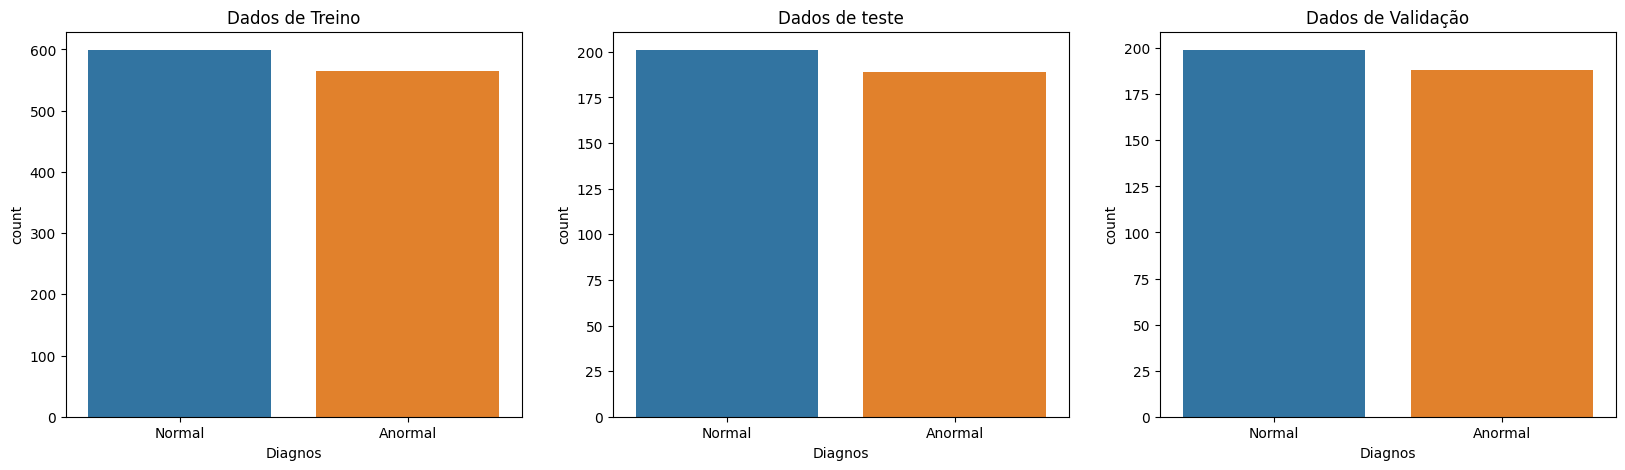

In [8]:
# Plotando os dados de imagens de treino, teste e validação
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(x=train_df['Diagnos'])
plt.title('Dados de Treino')

plt.subplot(1,3,2)
sns.countplot(x=test_df['Diagnos'])
plt.title('Dados de teste')

plt.subplot(1,3,3)
sns.countplot(x=val_df['Diagnos'])
plt.title('Dados de Validação')

plt.show()

## Plotando as imagens

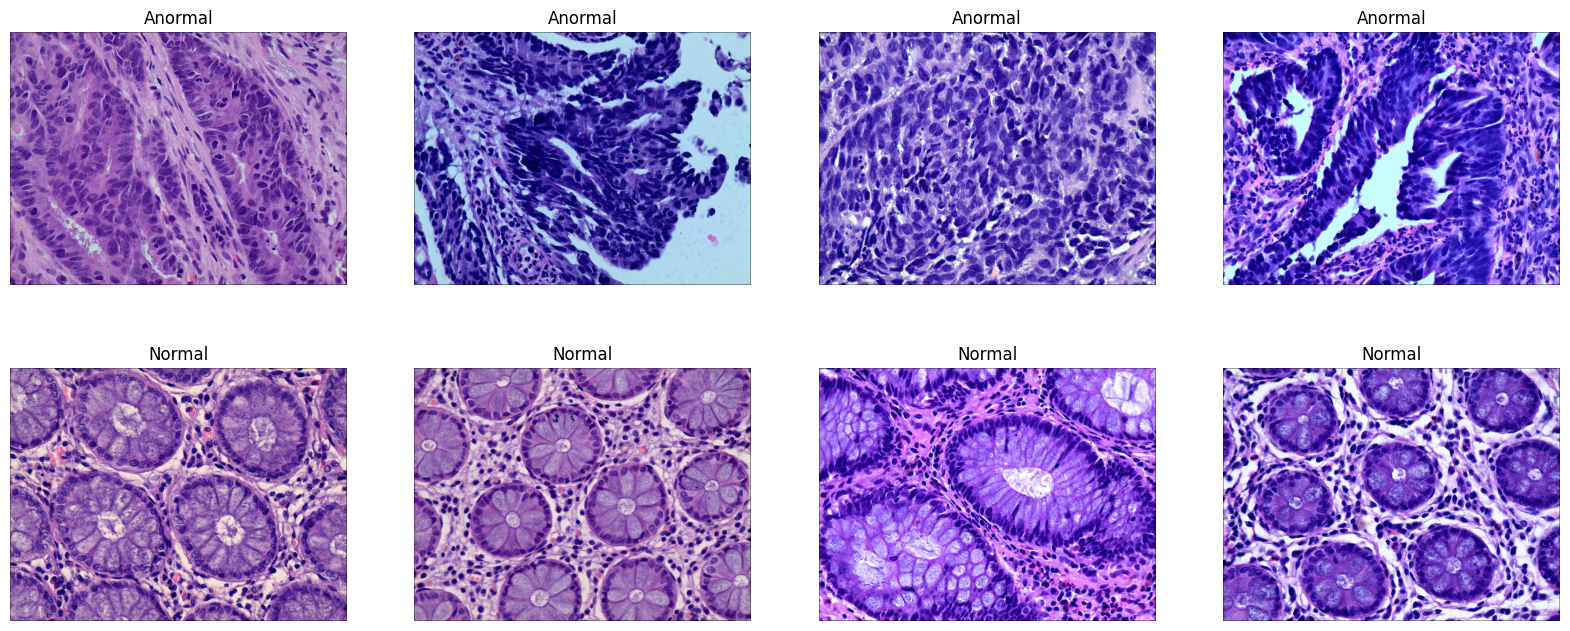

In [9]:
# revisando as imagens

plt.figure(figsize=(20,8))
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Anormal"][0:4]['image']):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Anormal')

for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Normal"][0:4]['image']):
    plt.subplot(2,4,4+i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Normal')

# 3. Preparando os dados

### Preparando dados das imagens de treinamento

In [10]:
# Preparando os dados das imagens de treino (image array and class name) para o processamento

# Declarando variáveis
x=[] # armazena os valores das imagens
y=[] # armazena os rótulos das imagens

for folder in os.listdir(train_folder):
    image_list=os.listdir(train_folder+"/"+folder)
    for img_name in image_list:
        # Carregando imagens
        img=image.load_img(train_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))

        # Conventendo para array
        img=image.img_to_array(img)

        # Transfer Learning: isto é para aplicar o pré-processo do modelo VGG16 às nossas imagens antes de passá-lo para o VGG16
        img=preprocess_input(img) #  Passo opicional

        # Anexando ao array
        x.append(img) # anexa img
        y.append(train_class_names.index(folder)) # anexa o indíce da classe

print("Preparação do Dataset de treino completa.")

Preparação do Dataset de treino completa.


### Preparando dados das imagens de teste e validação

In [11]:
# Preparando os dados de validação (image array and class name) para processamento

# Variáveis
val_images=[]
val_images_Original=[]
val_image_label=[] # armazenar os rótulos das imagens

for folder in os.listdir(val_folder):
    image_list=os.listdir(val_folder+"/"+folder)
    for img_name in image_list:
        # Carregando as imagens
        img=image.load_img(val_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))

        # Convertendo para array
        img=image.img_to_array(img)

        # Salvando imagens originais, será usado para apresentar no final
        val_images_Original.append(img.copy())

        # Transfer Learning: this is to apply preprocess of VGG16 to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step

        # Anexando ao array
        val_images.append(img) # anexa img
        val_image_label.append(val_class_names.index(folder))

print("Preparação do Dataset de validação completa")

Preparação do Dataset de validação completa


In [12]:
# Preparando os dados de teste (image array and class name) para processamento

# variáveis
test_images=[]
test_images_Original=[]
test_image_label=[] # armazena os rótulos das imagens

for folder in os.listdir(test_folder):
    image_list=os.listdir(test_folder+"/"+folder)
    for img_name in image_list:
        # carregando imagens
        img=image.load_img(test_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))

        # Convertendo para array
        img=image.img_to_array(img)

        # Salvando imagens originais, será usado para apresentar no final
        test_images_Original.append(img.copy())

        # Transfer Learning: this is to apply preprocess of VGG16 to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step

        # Anexando ao array
        test_images.append(img) # anexa img
        test_image_label.append(test_class_names.index(folder))

print("Preparação do Dataset de teste completa.")

Preparação do Dataset de teste completa.


### Verificando o dataset

In [13]:
# Verificando as saídas.

# Dataset de treino
print("Dataset de treino")

x=np.array(x) # Convertendo para np arrary para passar para o modelo
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# ===========

# Dataset de teste
print("Dataset de teste")

test_images=np.array(test_images)
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# ===========

# Dataset de validação
print("Dataset de validação")

val_images=np.array(val_images)
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Dataset de treino
(1163, 400, 400, 3)
(1163, 2)
Dataset de teste
(390, 400, 400, 3)
(390, 2)
Dataset de validação
(387, 400, 400, 3)
(387, 2)


# 5. Construíndo um modelo: usando Transfer Learning - VGG16 model

A aprendizagem por transferência (TL) é um problema de pesquisa em aprendizado de máquina (ML) que se concentra em armazenar o conhecimento adquirido ao resolver um problema e aplicá-lo a um problema diferente, mas relacionado. Por exemplo, o conhecimento adquirido ao aprender a reconhecer carros pode ser aplicado ao tentar reconhecer caminhões. (Fonte: https://en.wikipedia.org/wiki/Transfer_learning)

A aprendizagem por transferência é um método de aprendizado de máquina em que um modelo desenvolvido para uma tarefa é reutilizado como ponto de partida para um modelo em uma segunda tarefa relacionada à tarefa original.

É bastante popular no aprendizado profundo, onde modelos pré-treinados são usados como ponto de partida em tarefas de Visão Computacional (CV) e Processamento de Linguagem Natural (PNL). Esta é uma abordagem muito útil, pois economiza muito tempo e recursos. Desta forma, pode-se aproveitar o benefício de usar modelos complexos desenvolvidos por terceiros como ponto de partida e, em cima disso, desenvolver outro.

## Verificando o modelo default VGG16

In [14]:
# Verificando as propriedades do modelo que vamos usar para Transfer Learning

print("Resumo do modelo VGG16 padrão.\n")

# Estamos usando VGG16 para transferência de aprendizagem
from tensorflow.keras.applications import VGG16

# Inicializando o modelo com pesos='imagenet. Estamos carregando seus pesos originais.
model_vgg16=VGG16(weights='imagenet')

# Mostra o summary para ver as propriedades do modelo
model_vgg16.summary()

Resumo do modelo VGG16 padrão.

553467096/553467096 [==============================] - 25s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                           

## **Observações:**
1. Queremos carregar pesos como no modelo original, então estamos carregando pesos = 'imagenet'
2. A primeira camada é a camada de entrada que aceita tamanho de imagem = (224, 224, 3). Nosso tamanho de imagem é diferente, então precisamos alterar o parâmetro - image_size na primeira camada. Nosso tamanho será: (400,400, 3)
3. Queremos alterar a última camada, pois temos um problema de classificação de 10 classes. Então, não incluiremos a camada superior
4. Além disso, não treinaremos todas as camadas, exceto a última, pois teremos que treiná-la. Portanto, definiremos propriedades para trainable = False, exceto para a parte superior, ou seja, a última camada.

## Modelo VGG16 de uso personalizado (definir camada de entrada, remover a última camada (superior))

In [15]:
# Modelando com Transfer Learning

# Aqui prepararemos o modelo de acordo com nossos requisitos

print("Resumo do modelo VGG16 personalizado.\n")
print("1) Configuramos a camada de entrada e 2) Removemos a (última) camada superior. \n")

# vamos preparar nosso input_layer para passar o tamanho da imagem. o padrão é (224.224,3). vamos mudar para (400,400,3)
input_layer=layers.Input(shape=(img_width,img_height,3))

# inicializamos o modelo de transferência VGG16 com propriedades apropriadas de acordo com nossa necessidade.
# estamos passando parâmetros como segue
# 1) pesos='imagenet' - Usando isto estamos carregando pesos como os pesos originais.
#2) input_tensor para passar o VGG16 usando input_tensor
# 3) queremos alterar a última camada para não incluir a camada superior
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# Mostra o resumo do modelo com nossas propriedades
model_vgg16.summary()

Resumo do modelo VGG16 personalizado.

1) Configuramos a camada de entrada e 2) Removemos a (última) camada superior. 

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_

**Observação:**

1. A primeira camada tem tamanho de imagem = (400,400,3) agora conforme definimos.
1. Além disso, veja as 2 camadas superiores (últimas) a seguir que estavam lá no VGG16 original agora não fazem parte de nossa camada personalizada porque definimos include_top=False:

flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 1000)              4097000   

## Configurando a última camada personalizada (superior)

In [16]:
# acessando a última camada atual do modelo e adicionando flatten e dense depois dela

print("Resumo do modelo VGG16 personalizado.\n")
print("1) Achatamos a última camada e adicionamos 1 camada densa e 1 camada de saída.\n")

last_layer=model_vgg16.output # Estamos pegando a última camada do modelo

# Adicionar camada flatten: estamos estendendo a rede neural adicionando a camada flatten
flatten=layers.Flatten()(last_layer)

# Adicionando a camada dense
# dense1=layers.Dense(100,activation='relu')(flatten)

# Adicionando a camada dense para a camada de saída final
output_layer=layers.Dense(2,activation='softmax')(flatten)

# Criando o modelo com as camadas de entrada e saída
model=models.Model(inputs=input_layer,outputs=output_layer)

# Mostrando os dados do modelo
model.summary()

Resumo do modelo VGG16 personalizado.

1) Achatamos a última camada e adicionamos 1 camada densa e 1 camada de saída.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
        

## Congelando todas as camadas, exceto a última que adicionamos

In [17]:
# vamos congelar todas as camadas, exceto a última camada

# estamos tornando todas as camadas não treináveis, exceto a última camada
print("Estamos tornando todas as camadas não treináveis, exceto a última camada. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

Estamos tornando todas as camadas não treináveis, exceto a última camada. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                                                   

# 6. Modelo de treino

In [18]:
# Train the Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Divisão de dados para treinamento e teste concluída.")

Divisão de dados para treinamento e teste concluída.


# 7. Compilação do modelo

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Compilação do modelo completa.")

Compilação do modelo completa.


# 8. Treinando o modelo

In [ ]:
# Fit the Model

model.fit(xtrain,ytrain,epochs=epochs,batch_size=batch_size,verbose=True,validation_data=(xtest,ytest))

print("Treino do modelo concluído.")

Epoch 1/10
 2/30 [=>............................] - ETA: 10s - loss: 73.8245 - accuracy: 0.4531 

# 9. Funções para avaliação do modelo

In [ ]:
# Esta função ajuda a prever a imagem individual fornecida a ela
def predict(img_name):
    img=image.load_img(img_name,target_size=(img_width,img_height))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)
#     plt.imshow(img.astype('int32'))
#     plt.show()
    prediction=model.predict(img.reshape(1,img_width,img_height,3))
    output=np.argmax(prediction)
    print(train_class_names[output] + ": " + Get_Image_Type(train_class_names[output]))
#     print(train_class_names[output])
#     print(class_names_actual[output])



# Esta função plota a imagem fornecida no array
def plot_image(i, predictions_array, true_label, img): # pegando o index e 3 arrays viz. prediction array, true label array e image array

    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.astype('int32'))

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

#     print(predicted_label)
#     print(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour

#     predicted_class=val_class_names[predicted_label]
#     true_class=val_class_names[true_label]

    plt.xlabel("{} {:2.0f}% \n ({})".format(str(Get_Image_Type(val_class_names[predicted_label])), 100*np.max(predictions_array), str(Get_Image_Type(val_class_names[true_label])), color=color, horizontalalignment='left'))
#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 100*np.max(predictions_array), val_class_names[true_label]), color=color)

# Esta função traça um gráfico de barras fornecido nos dados do array
def plot_value_array(i, predictions_array, true_label): # pegando o índice junto com as previsões e a matriz true label
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)
#     print(predicted_label)
#     print(true_label)
    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1

    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

# 10. Predições

In [ ]:
# Preparando o array de predição
val_predictions=[]

for img in val_images:
    img=img.reshape(1,img_width,img_height,3)
    val_predictions.append(model.predict(img))

test_predictions=[]

for img in test_images:
    img=img.reshape(1,img_width,img_height,3)
    test_predictions.append(model.predict(img))

In [ ]:
# Predição de imagens individuais

# !wget -q url
predict(path+'train/NORMAL/c02-2012915-1-400-001.jpg')

predict(path+'train/ANORMAL/c01-2001838-1-400-005.jpg')

predict(path+'test/ANORMAL/c01-2012324-1-400-013.jpg')

predict(path+'val/ANORMAL/c01-2012219-1-400-001.jpg')


# chamando a função

# definoindo parametros para a funçao
i=random.randrange(1,10) # imagem número 12. Você pode alterar o valor de i para brincar
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# estamos passando "val_images_Original" apenas para mostrar a imagem original em vez de "val_images"
# que é pré-processado como processo VGG16 e usado para previsão.
plot_image(i,val_predictions, val_image_label, val_images_Original)
plt.subplot(1,2,2)
plot_value_array(i, val_predictions, val_image_label)
plt.show()

In [ ]:
# Previsão nas imagens de teste

# variáveis
num_rows=4
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classificação da imagens histológicas de teste em normal e anormal usando aprendizagem por transferência (VGG16)\n")
print("Diagnóstico predito, Percentual, (Diagnóstico Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
#     ii=random.randrange(1,227)
  # estamos passando "val_images_Original" apenas para mostrar a imagem original em vez de "val_images"
  # que é pré-processado como processo VGG16 e usado para previsão.
    indexer=random.randrange(1,624)
    plot_image(indexer,test_predictions, test_image_label, test_images_Original)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(indexer, test_predictions, test_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
# Predição nas imagens de validação

# Variáveis
num_rows=4
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classificação da imagens histológicas de teste em normal e anormal usando aprendizagem por transferência (VGG16)\n")
print("Diagnóstico predito, Percentual, (Diagnóstico Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
#     ii=random.randrange(1,227)
  # estamos passando "val_images_Original" apenas para mostrar a imagem original em vez de "val_images"
  # que é pré-processado como processo VGG16 e usado para previsão.
    plot_image(i,val_predictions, val_image_label, val_images_Original)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, val_predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
print("Fim do processamento.")